In [1]:
# Basic imports & variables
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import re

nih_dataset = '../data/nih-dataset'

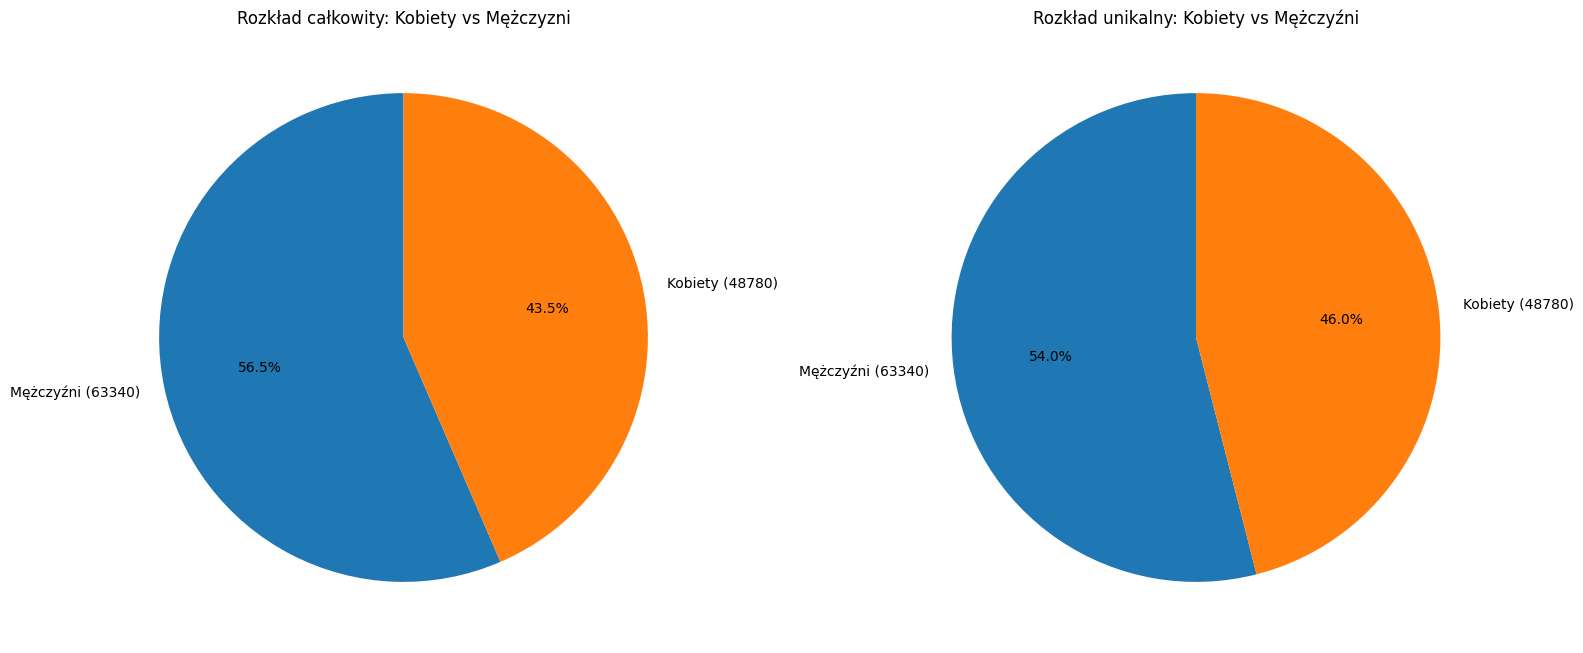

In [2]:
# Data Entry file content analysis
data_entry_file = f'{nih_dataset}/Data_Entry_2017.csv'
data_frame = pd.read_csv(data_entry_file, delimiter=',', nrows = None)

# Get gender counts from file
total_gender_counts = data_frame['Patient Gender'].value_counts()
unique_gender_counts = data_frame.groupby('Patient ID')['Patient Gender'].first().value_counts()

def pie_label(gender, count):
    return f"Mężczyźni ({count})" if gender == "M" else f"Kobiety ({count})"

# Prepare plot
plt.figure(figsize=(16, 8))

# Total gender distribution
total_gender_labels = [pie_label(gender, count) for gender, count in zip(total_gender_counts.index, total_gender_counts)]
plt.subplot(1, 2, 1)
plt.pie(total_gender_counts, labels=total_gender_labels, autopct='%1.1f%%', startangle=90)
plt.title("Rozkład całkowity: Kobiety vs Mężczyzni")

# Unique gender distribution
unique_gender_labels_updated = [pie_label(gender, count) for gender, count in zip(unique_gender_counts.index, total_gender_counts)]
plt.subplot(1, 2, 2)
plt.pie(unique_gender_counts, labels=unique_gender_labels_updated, autopct='%1.1f%%', startangle=90)
plt.title("Rozkład unikalny: Kobiety vs Mężczyźni")

plt.tight_layout()
plt.show()

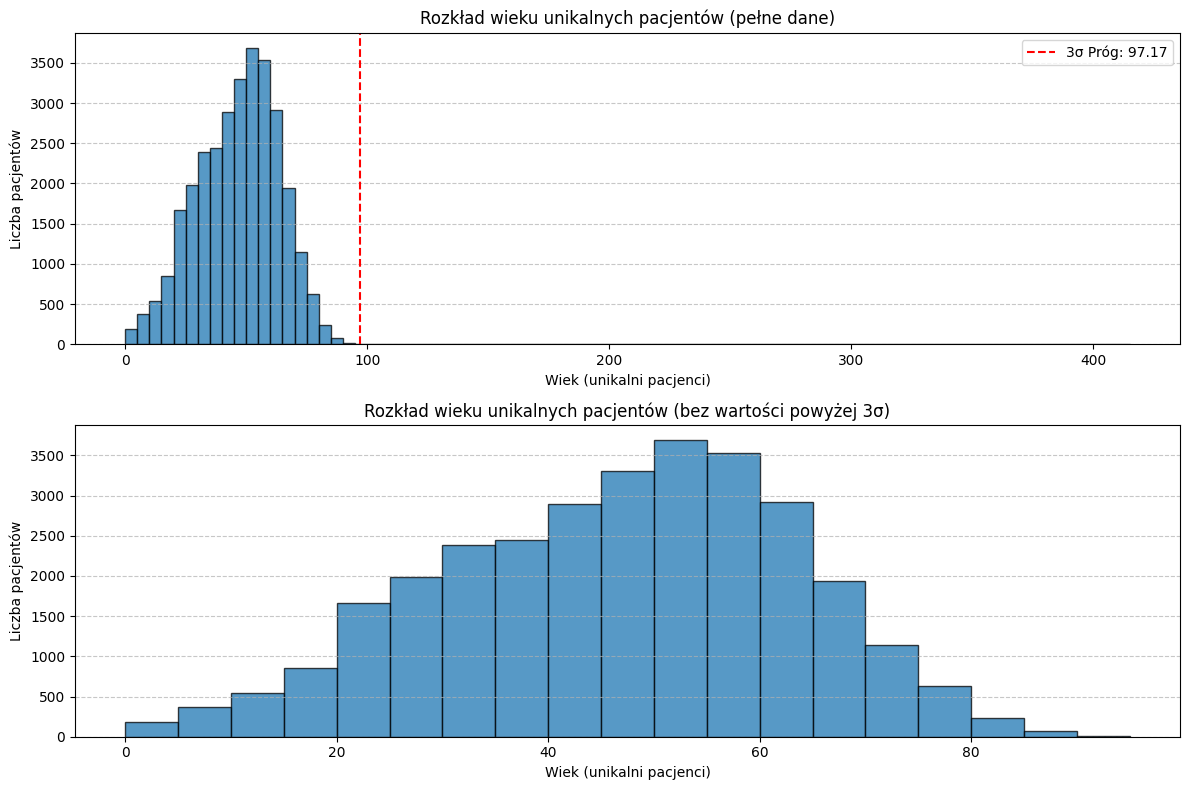

In [3]:
# Data Entry file content analysis
data_entry_file = f'{nih_dataset}/Data_Entry_2017.csv'
data_frame = pd.read_csv(data_entry_file, delimiter=',', nrows = None)
unique_patients = data_frame.groupby('Patient ID')['Patient Age'].first()

# Filter data to exclude outliers above the 3σ threshold
mean_unique_age = unique_patients.mean()
std_dev_unique_age = unique_patients.std()
outlier_threshold_upper_std = mean_unique_age + 3 * std_dev_unique_age
filtered_unique_patients = unique_patients[unique_patients <= outlier_threshold_upper_std]

# Create a figure with two subplots
plt.figure(figsize=(12, 8))

# First subplot: Original data with standard deviation threshold
plt.subplot(2, 1, 1)
plt.hist(unique_patients, bins=range(0, int(unique_patients.max()) + 5, 5), edgecolor='black', alpha=0.75)
plt.axvline(outlier_threshold_upper_std, color='red', linestyle='--', label=f'3σ Próg: {outlier_threshold_upper_std:.2f}')
plt.xlabel("Wiek (unikalni pacjenci)")
plt.ylabel("Liczba pacjentów")
plt.title("Rozkład wieku unikalnych pacjentów (pełne dane)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Second subplot: Filtered data with better accuracy
plt.subplot(2, 1, 2)
plt.hist(filtered_unique_patients, bins=range(0, int(filtered_unique_patients.max()) + 5, 5), edgecolor='black', alpha=0.75)
plt.xlabel("Wiek (unikalni pacjenci)")
plt.ylabel("Liczba pacjentów")
plt.title("Rozkład wieku unikalnych pacjentów (bez wartości powyżej 3σ)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap and show the plots
plt.tight_layout()
plt.show()


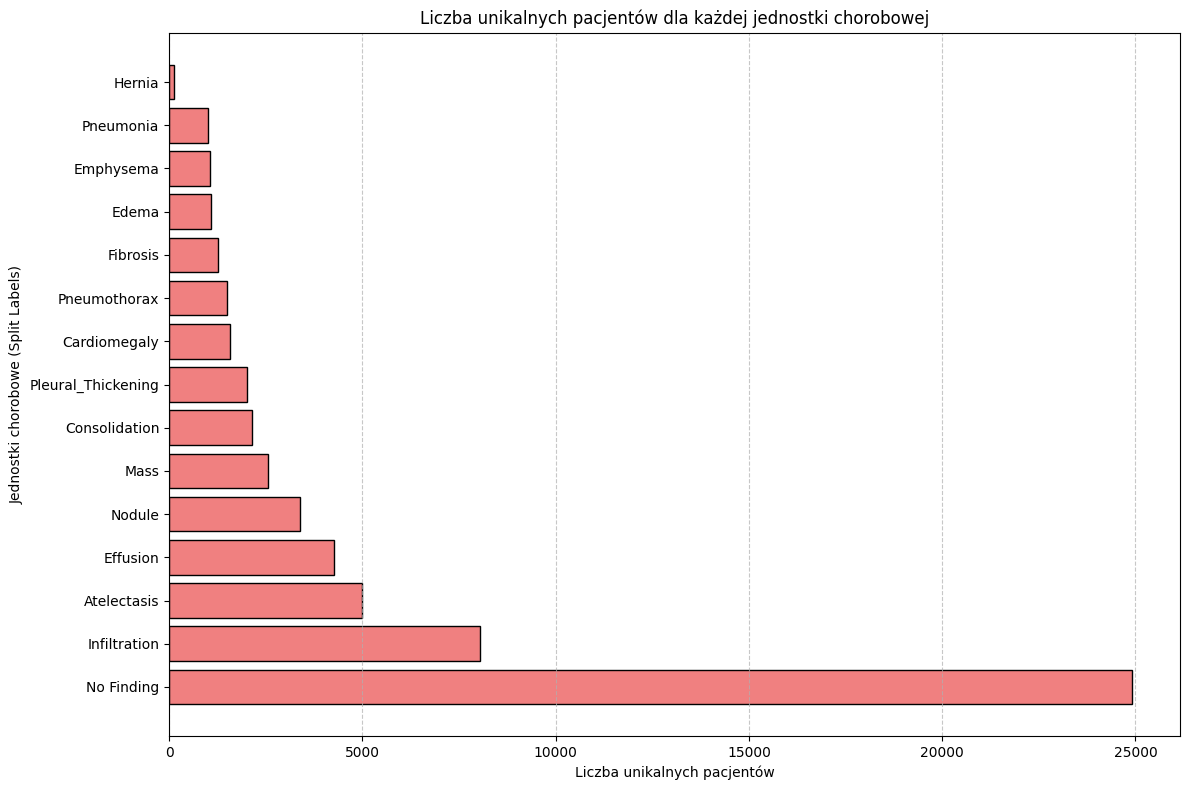

In [4]:
# Data Entry file content analysis
data_entry_file = f'{nih_dataset}/Data_Entry_2017.csv'
data_frame = pd.read_csv(data_entry_file, delimiter=',', nrows = None)
data_split_labels = data_frame.copy()
data_split_labels['Split Labels'] = data_split_labels['Finding Labels'].str.split('|')
unique_patient_labels = data_split_labels.copy()
unique_patient_labels = unique_patient_labels.groupby(['Patient ID']).agg({
    'Split Labels': lambda x: set([label for sublist in x for label in sublist])
}).explode('Split Labels').reset_index()

# Count unique patient occurrences for each disease
unique_disease_patient_count = unique_patient_labels['Split Labels'].value_counts()

# Visualize the unique patient count for each disease
plt.figure(figsize=(12, 8))
plt.barh(unique_disease_patient_count.index, unique_disease_patient_count.values, color='lightcoral', edgecolor='black')
plt.xlabel("Liczba unikalnych pacjentów")
plt.ylabel("Jednostki chorobowe (Split Labels)")
plt.title("Liczba unikalnych pacjentów dla każdej jednostki chorobowej")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

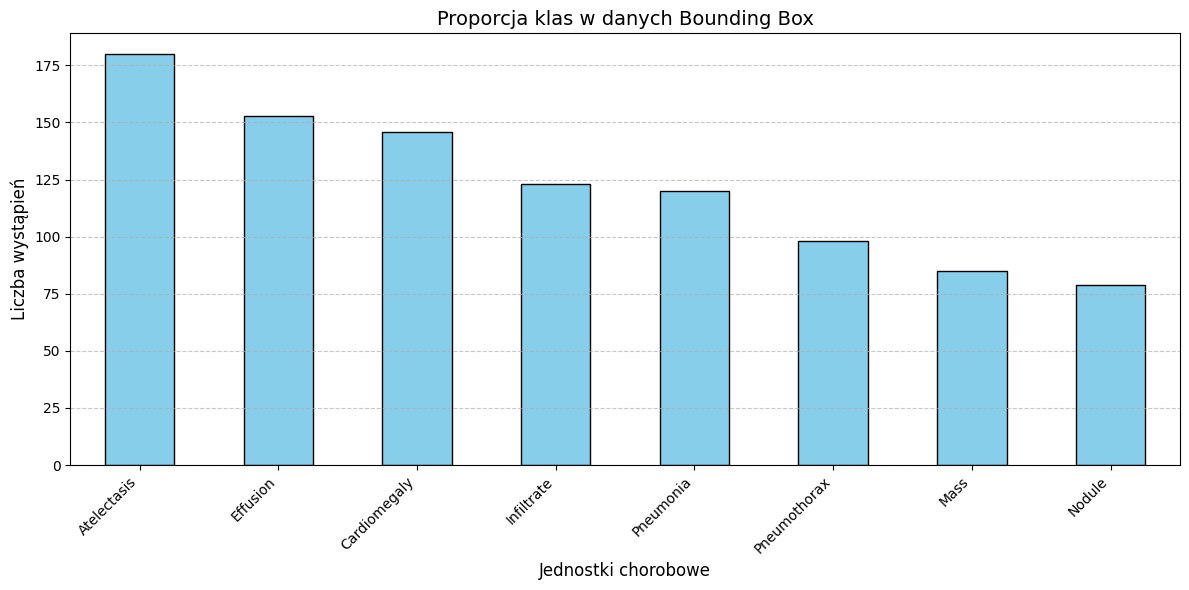

In [8]:
# BBox Data Analysis
bounding_box_file = f"{nih_dataset}/BBox_List_2017.csv"
bounding_box_frame = pd.read_csv(bounding_box_file, delimiter=',', nrows = None)

bbox_class_counts = bounding_box_frame['Finding Label'].value_counts()

# Plot the class distribution as a bar chart
plt.figure(figsize=(12, 6))
bbox_class_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Proporcja klas w danych Bounding Box", fontsize=14)
plt.xlabel("Jednostki chorobowe", fontsize=12)
plt.ylabel("Liczba wystąpień", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [11]:
# Identify invalid Bounding Boxes with zero or negative dimensions
invalid_bboxes = bounding_box_frame[
    (bounding_box_frame['w'] <= 0) | (bounding_box_frame['h]'] <= 0)  # Adjusting for column 'h]'
]

# Count invalid Bounding Boxes
invalid_bbox_count = len(invalid_bboxes)
print(f"Liczba błędnych BBoxów z ujemnymi/zerowymi wymiarami: {invalid_bbox_count}")

# Display the first few invalid Bounding Boxes
invalid_bboxes.head()

Liczba błędnych BBoxów z ujemnymi/zerowymi wymiarami: 0


,Image Index,Finding Label,Bbox [x,y,w,h],Unnamed: 6,Unnamed: 7,Unnamed: 8


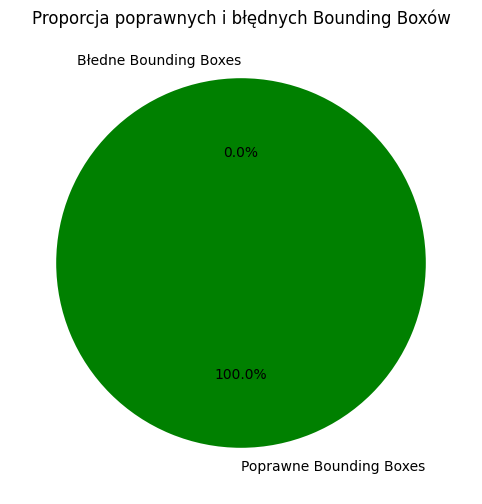

In [14]:
# Validate bounding boxes
valid_bboxes = bounding_box_frame[
    (bounding_box_frame['w'] > 0) & (bounding_box_frame['h]'] > 0)  # Only valid bounding boxes
]
invalid_bboxes = bounding_box_frame[
    (bounding_box_frame['w'] <= 0) | (bounding_box_frame['h]'] <= 0)  # Invalid bounding boxes
]

# Counts for valid and invalid bounding boxes
valid_bbox_count = len(valid_bboxes)
invalid_bbox_count = len(invalid_bboxes)

# Data for the pie chart
bbox_counts = [valid_bbox_count, invalid_bbox_count]
labels = ['Poprawne Bounding Boxes', 'Błedne Bounding Boxes']
colors = ['green', 'red']

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(bbox_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Proporcja poprawnych i błędnych Bounding Boxów")
plt.show()


In [6]:
# Get Data required of analysis
pattern = re.compile(r'images_\d{3}')
matching_dirs = [
    os.path.join(nih_dataset, d)
    for d in os.listdir(nih_dataset)
    if os.path.isdir(os.path.join(nih_dataset, d)) and pattern.match(d)
]

image_files = set()
for directory in matching_dirs:
    nested_dir = f"{directory}/images"
    image_files.update(os.listdir(nested_dir))    

data_entry_file = f'{nih_dataset}/Data_Entry_2017.csv'
data_entry_frame = pd.read_csv(data_entry_file, delimiter=',', nrows = None)

bounding_box_file = f"{nih_dataset}/BBox_List_2017.csv"
bounding_box_frame = pd.read_csv(bounding_box_file, delimiter=',', nrows = None)

NameError: name 'matching_dirs' is not defined

In [ ]:
images_in_data_entry = set(data_entry_frame['Image Index'])
images_in_bbox_data = set(bounding_box_frame['Image Index'])

extra_in_data_entry = images_in_data_entry - image_files
missing_in_data_entry = image_files - images_in_data_entry

extra_in_bbox_data = images_in_bbox_data - image_files
missing_in_bbox_data = image_files - images_in_bbox_data

summary_table_data = {
    'Plik': ['Data Entry List', 'BBox Entry List'],
    'Brakujace Zdjecia': [len(missing_in_data_entry), len(missing_in_bbox_data)],
    'Nadmiarowe Zdjecia': [len(extra_in_data_entry), len(extra_in_bbox_data)]
}

# Build Table
summary_table_df = pd.DataFrame(summary_table_data)
fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('tight')
ax.axis('off')

table = ax.table(
    cellText=summary_table_df.values,
    colLabels=summary_table_df.columns,
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5)

plt.show()